## Exercise

Do the same for your steel bike. Make sure you get the same LCIA results as before.

In [1]:
import bw2calc as bc
import bw_processing as bwp
import matrix_utils as mu
import numpy as np
import stats_arrays as sa
import seaborn as sb

In [2]:
coal = 900
steel = 901
iron_mining = 902
steel_bike = 903
iron_ore = 1000

In [3]:
t_data = np.array([
    1,
    1,
    1,
    1,
    1.1,
    0.2,
    8,
    0.001,
    0.001,
    0.005,
])
t_indices = np.array(
    [
        (coal, coal),
        (steel, steel),
        (iron_mining, iron_mining),
        (steel_bike, steel_bike),
        (iron_mining, steel),
        (coal, steel),
        (steel, steel_bike),
        (steel_bike, iron_mining),
        (steel_bike, coal),
        (steel_bike, steel),
    ], 
    dtype=bwp.INDICES_DTYPE
)
t_uncertainty = np.array([
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.TriangularUncertainty.id, 1.1, np.NaN, np.NaN, 1, 1.25, False), 
        (sa.TriangularUncertainty.id, 0.2, np.NaN, np.NaN, 0.1, 0.5, False),
        (sa.TriangularUncertainty.id, 8, np.NaN, np.NaN, 4, 15, False),
        (sa.NoUncertainty.id, 0.001, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.NoUncertainty.id, 0.001, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.NoUncertainty.id, 0.005, np.NaN, np.NaN, np.NaN, np.NaN, False),
    ], 
    dtype=bwp.UNCERTAINTY_DTYPE
)
t_flip = np.array([False, False, False, False, True, True, True, True, True, True])

In [4]:
b_data = np.array([1.25])
b_uncertainty = np.array([
        (sa.TriangularUncertainty.id, 1.25, np.NaN, np.NaN, 1, 1.75, False), 
    ], 
    dtype=bwp.UNCERTAINTY_DTYPE
)
b_indices = np.array([
    (iron_ore, iron_mining),
    ], 
    dtype=bwp.INDICES_DTYPE
)

In [5]:
c_data = np.array([3.141])
c_uncertainty = np.array([
        (sa.NormalUncertainty.id, 3.141, 0.5926535, np.NaN, np.NaN, np.NaN, False), 
    ], 
    dtype=bwp.UNCERTAINTY_DTYPE
)
c_indices = np.array([
    (iron_ore, iron_ore),
    ], 
    dtype=bwp.INDICES_DTYPE
)

We can now create our datapackage, and add the data for all three matrices to it:

In [6]:
dp_steel_bike = bwp.create_datapackage()

In [7]:
dp_steel_bike.add_persistent_vector(
    matrix='technosphere_matrix',
    indices_array=t_indices,
    data_array=t_data,
    flip_array=t_flip,
    distributions_array=t_uncertainty,
)
dp_steel_bike.add_persistent_vector(
    matrix='biosphere_matrix',
    indices_array=b_indices,
    data_array=b_data,
    distributions_array=b_uncertainty,
)

In [8]:
dp_steel_bike_lcia = bwp.create_datapackage()
dp_steel_bike_lcia.add_persistent_vector(
    matrix='characterization_matrix',
    indices_array=c_indices,
    data_array=c_data,
    distributions_array=c_uncertainty,
)

In [9]:
lca = bc.LCA(
    demand={steel_bike: 1},
    data_objs=[dp_steel_bike, dp_steel_bike_lcia],
    use_distributions=True,
)
lca.lci()
lca.lcia()

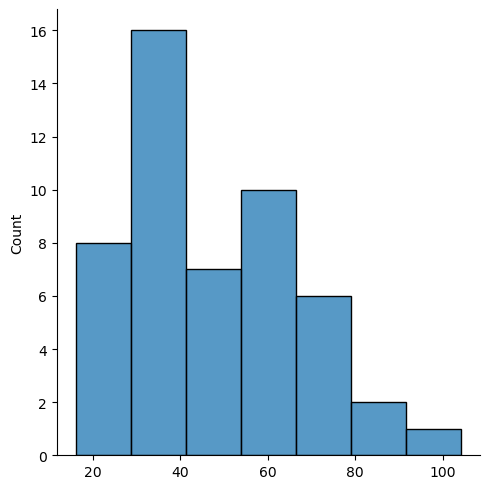

In [10]:
mc_results = [lca.score for _ in zip(range(50), lca)]
sb.displot(np.array(mc_results))

## Exercise

Can you build a half steel, half carbon fiber bike? Can you construct scenarios to vary the percentages (say, three scenarios)?

In [11]:
natural_gas = 101
carbon_fibre = 102
bike = 103
co2 = 201

In [12]:
t_data = np.array([
    1,   # production of natural gas
    1,   # production of carbon fibre
    1,   # production of bike
    237, # input of natural gas
    2.5, # input of carbon fibre
])
t_indices = np.array([
    (natural_gas, natural_gas), # production of natural gas
    (carbon_fibre, carbon_fibre), # production of carbon fibre
    (bike, bike), # production of bike
    (natural_gas, carbon_fibre), # input of natural gas
    (carbon_fibre, bike), # input of carbon fibre
    ], 
    dtype=bwp.INDICES_DTYPE
)
t_flip = np.array([False, False, False, True, True]) # Numerical sign of the inputs needs to be flipped negative

In [13]:
b_data = np.array([26.6])
b_indices = np.array([
    (co2, carbon_fibre), # emission of CO2
    ], 
    dtype=bwp.INDICES_DTYPE
)

In [14]:
c_data = np.array([1])
c_indices = np.array([
    (co2, co2), # CF of CO2
    ], 
    dtype=bwp.INDICES_DTYPE
)

In [15]:
t_uncertainty = np.array([
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),    
        (sa.NoUncertainty.id, 1, np.NaN, np.NaN, np.NaN, np.NaN, False),    
        (sa.TriangularUncertainty.id, 237, np.NaN, np.NaN, 200, 300, False), # triangular uncertainty from 200 to 300  
        (sa.TriangularUncertainty.id, 2.5, np.NaN, np.NaN, 2, 3, False), # triangular uncertainty from 2 to 3
    ], 
    dtype=bwp.UNCERTAINTY_DTYPE
)
b_uncertainty = np.array([
        (sa.NormalUncertainty.id, 26.6, 1.5, np.NaN, np.NaN, np.NaN, False), # normal uncertainty with std. dev. of 1.5
    ], 
    dtype=bwp.UNCERTAINTY_DTYPE
)

In [16]:
dp_stochastic = bwp.create_datapackage()

In [17]:
dp_stochastic.add_persistent_vector(
    matrix='technosphere_matrix',
    indices_array=t_indices,
    data_array=t_data,
    flip_array=t_flip,
    distributions_array=t_uncertainty,
)
dp_stochastic.add_persistent_vector(
    matrix='biosphere_matrix',
    indices_array=b_indices,
    data_array=b_data,
    distributions_array=b_uncertainty,
)
dp_stochastic.add_persistent_vector(
    matrix='characterization_matrix',
    indices_array=c_indices,
    data_array=c_data,
)

In [18]:
hybrid_bike = 601

In [19]:
dp_scenarios = bwp.create_datapackage(sequential=True)
dp_scenarios.add_persistent_array(
    matrix='technosphere_matrix',
    indices_array=np.array([
        (hybrid_bike, hybrid_bike),
        (steel_bike, hybrid_bike),
        (bike, hybrid_bike),
    ], dtype=bwp.INDICES_DTYPE),
    data_array=np.array([
        (1, 1, 1),
        (0.25, 0.5, 0.75),
        (0.75, 0.5, 0.25),
    ]),
    flip_array=np.array([False, True, True]),
    name='bike materials scenario'
)

In [20]:
lca = bc.LCA(
    demand={hybrid_bike: 1},
    data_objs=[dp_steel_bike, dp_stochastic, dp_scenarios],
    use_distributions=True,
    use_arrays=True,
)
lca.lci()
lca.lcia()
lca.keep_first_iteration()

In [21]:
for label in ("25% steel", "50% steel", "75% steel"):
    next(lca)
    print(f"{label}: {lca.score:.4g}")

25% steel: 49.39
50% steel: 37.35
75% steel: 14.93
